<a href="https://colab.research.google.com/github/shpotes/image-classification/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/
!rm -rf image-classification
!git clone https://github.com/shpotes/image-classification/
%cd image-classification
!pip install -q -r requirement.txt

/content
Cloning into 'image-classification'...
remote: Enumerating objects: 3817, done.
remote: Counting objects: 100% (3817/3817), done.
remote: Compressing objects: 100% (2384/2384), done.
remote: Total 3817 (delta 1468), reused 3770 (delta 1428), pack-reused 0
Receiving objects: 100% (3817/3817), 6.44 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (1468/1468), done.
/content/image-classification


In [2]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from model.dataset import *
from model.model import *

%load_ext autoreload
%autoreload 2

with open('config.json') as raw_config:
    config = json.load(raw_config)
    
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

[('data/train/110006f7774f41c98fd9314ecbb1f6ef.jpg', 3),
 ('data/train/e63a66c8ce6541b6a31b91c9174e3c2d.jpg', 1),
 ('data/train/eb678ddcecac42279978de305780b55c.jpg', 3),
 ('data/train/863e5738a40d40849f7acacce41d4142.jpg', 1),
 ('data/train/db33c484666a4a7c861050b8c16b981e.jpg', 3)]

# Overfit single batch

In [17]:
model = VGG16(config, overfit_mode=True)
print(model)

VGG16

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 56, 56, 256

In [18]:
hist = model.train()

W0707 19:39:58.257396 139746404857728 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 1.6094 - accuracy: 0.2000 - val_loss: 1.6052 - val_accuracy: 0.3515
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 1.6043 - accuracy: 0.4000 - val_loss: 1.5597 - val_accuracy: 0.4408
Epoch 3/50
1/1 [==============================] - 5s 5s/step - loss: 1.6261 - accuracy: 0.2000 - val_loss: 1.6381 - val_accuracy: 0.0656
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 1.6017 - accuracy: 0.4000 - val_loss: 1.6183 - val_accuracy: 0.0437
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 1.6083 - accuracy: 0.2000 - val_loss: 1.6170 - val_accuracy: 0.1730
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 1.6090 - accuracy: 0.2000 - val_loss: 1.6173 - val_accuracy: 0.1348
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 1.6090 - accuracy: 0.4000 - val_loss: 1.6179 - val_accuracy: 0.0455
Epoch 8/50
1/1 [=========================

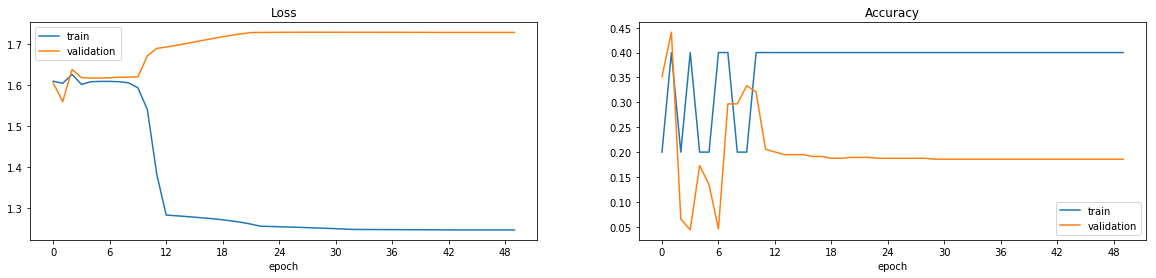

In [19]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

In [21]:
model.evaluate()

train
1/1 [==============================] - 0s 66ms/step - loss: 1.7742 - accuracy: 0.2000
test
106/106 [==============================] - 4s 41ms/step - loss: 1.7701 - accuracy: 0.1153


# Whole data

In [3]:
tf.keras.backend.clear_session()
config['train']['learning_rate'] = 1e-5
config['train']['batch_size'] = 12
config['train']['num_epochs'] = 60
model = VGG16(config, overfit_mode=False)
print(model)

VGG16

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256) 

In [4]:
hist = model.train()

W0707 21:31:07.661837 139930256107392 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.
W0707 21:31:07.779754 139930256107392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
215/215 [==============================] - 65s 300ms/step - loss: 1.3225 - accuracy: 0.4494 - val_loss: 1.2813 - val_accuracy: 0.4408
Epoch 2/60
215/215 [==============================] - 52s 244ms/step - loss: 1.1272 - accuracy: 0.5424 - val_loss: 0.9689 - val_accuracy: 0.6284
Epoch 3/60
215/215 [==============================] - 53s 247ms/step - loss: 0.9291 - accuracy: 0.6428 - val_loss: 0.8785 - val_accuracy: 0.6721
Epoch 4/60
215/215 [==============================] - 53s 246ms/step - loss: 0.8234 - accuracy: 0.6809 - val_loss: 0.8211 - val_accuracy: 0.6940
Epoch 5/60
215/215 [==============================] - 53s 248ms/step - loss: 0.7315 - accuracy: 0.7160 - val_loss: 0.7935 - val_accuracy: 0.6903
Epoch 6/60
215/215 [==============================] - 53s 248ms/step - loss: 0.6367 - accuracy: 0.7588 - val_loss: 0.8000 - val_accuracy: 0.6976
Epoch 7/60
215/215 [==============================] - 53s 247ms/step - loss: 0.5322 - accuracy: 0.8031 - val_loss: 0.8719 - val_ac

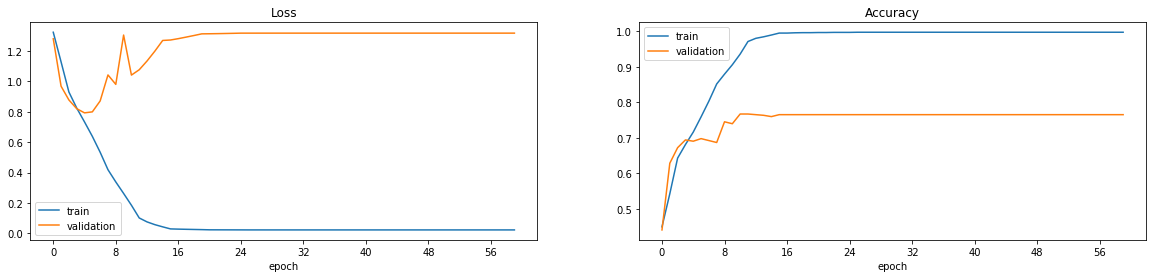

In [5]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

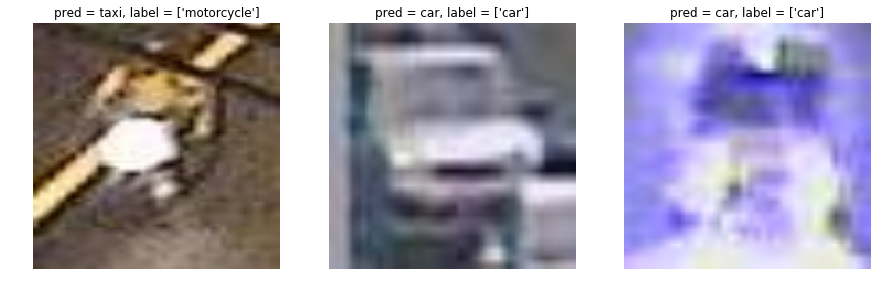

In [6]:
imshow_with_predictions(model, next(iter(model.test_data)), show_label=True, label_map=config['model']['labels'])

In [7]:
model.evaluate()

train
215/215 [==============================] - 16s 74ms/step - loss: 0.0225 - accuracy: 0.9969
test
45/45 [==============================] - 4s 90ms/step - loss: 1.3568 - accuracy: 0.7599


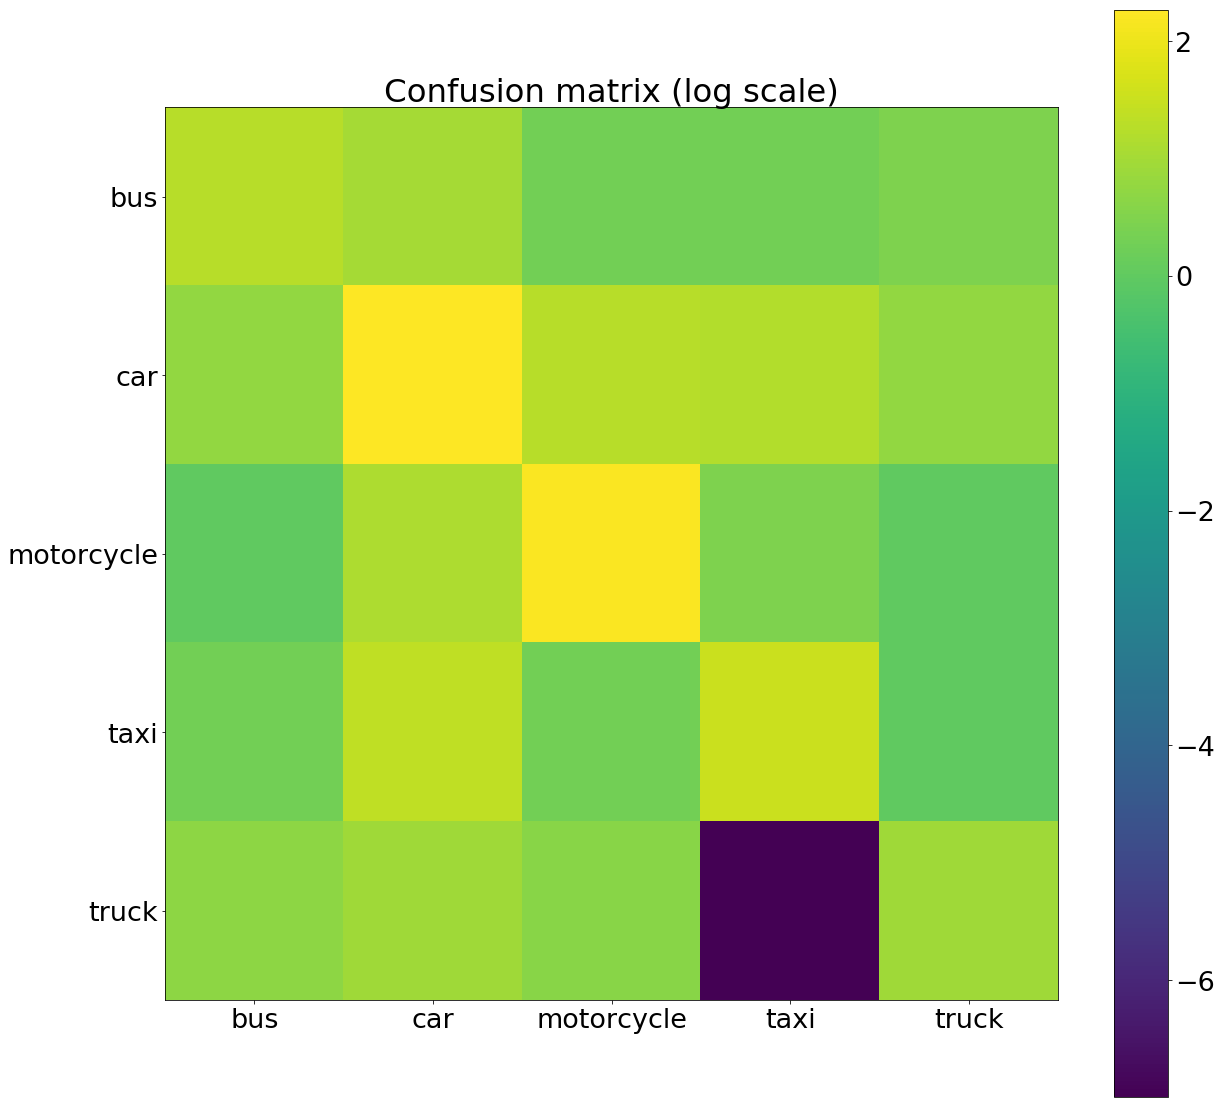

In [8]:
plt.rcParams.update({'font.size': 27})
plt.figure(figsize=(20, 20))
plt.imshow(np.log10(compute_confusion_matrix(model).numpy() + 0.0000001))
plt.yticks(np.arange(5), labels=config['model']['labels'])
plt.xticks(np.arange(5), labels=config['model']['labels'])
plt.title('Confusion matrix (log scale)')
plt.colorbar()